Importing libraries

In [1]:
import sklearn.datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

Loading the dataset

In [2]:
breast_cancer = sklearn.datasets.load_breast_cancer()

Making a dataframe named data, containing the data of the dataset and the feature names as column name

In [3]:
data = pd.DataFrame(breast_cancer.data,columns = breast_cancer.feature_names)

In [4]:
from sklearn.model_selection import train_test_split

adding another column named class in the dataframe which will contain the labels stating whether the features show 0(malignent) or 1(benign)

In [5]:
data['class'] = breast_cancer.target
x = data.drop('class',axis=1)
y=data['class']

Splitting the test and train size.

1. The default test size is 0.25, we are giving 0.1 (90% train 10% test)
2. The stratify parameter ensures that the statistical values remain same for both train and test
3. The train and test split is done randomly, which means that whenever we split the data, we get different sets. To overcome this problem, we use random_state which ensures that the pseudo random remains same

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.1,stratify=y,random_state=1)

$y = 1 , \mbox{if} \sum_i w_i x_i >= b$

$y = 0 , \mbox{otherwise}$

This is the formula for the perceptron

In [7]:
class Perceptron:
    def __init__(self):
        self.b = None #scalar
        self.w = None #array
        
    def model(self,x):
        return 1 if (np.dot(self.w,x)>=self.b) else 0 #according to formula
        
    def predict(self,X):
        Y =[]
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
        
    def fit(self,X,Y,epochs = 2):
        self.w = np.ones(X.shape[1]) #keeping all weights as 1 initially
        self.b = 0 
        
        accuracy = {} #keeping a dictionary of all the accuracy
        max_accuracy = 0
        
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
            
                if y_pred == 0 and y==1:
                    self.w = self.w + x  #adjustments
                    self.b = self.b + 1
                
                elif y_pred == 1 and y==0:
                    self.w = self.w - x  #adjustments
                    self.b = self.b - 1
            
            accuracy[i] = accuracy_score(self.predict(X),Y) #adding to dictionary
            if (accuracy[i]>max_accuracy): 
                max_accuracy = accuracy[i]

        
        print(max_accuracy)    
        plt.plot(accuracy.values())
        plt.ylim([0,1])
        plt.show()
            

In [8]:
percept = Perceptron()

Changing the types of X_train and X_test

In [9]:
X_train = X_train.values
X_test = X_test.values

0.927734375


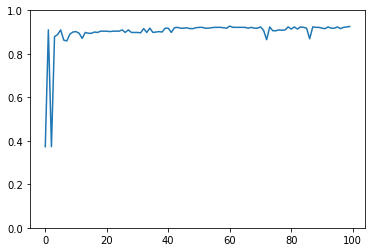

In [10]:
percept.fit(X_train,Y_train,100)

In [11]:
y_pred_train = percept.predict(X_train)
print(accuracy_score(y_pred_train,Y_train))

0.92578125


In [12]:
y_pred_test = percept.predict(X_test)
print(accuracy_score(y_pred_test,Y_test))

0.9298245614035088


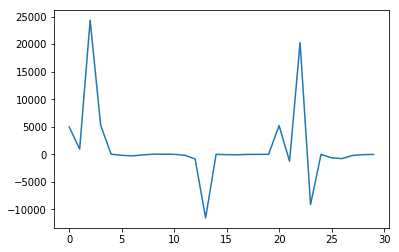

In [13]:
plt.plot(percept.w)
plt.show()